# 🚗 CAR DATA PREPROCESSING & EXPLORATORY ANALYSIS
**PHẦN 1: TIỀN XỬ LÝ DỮ LIỆU & PHÂN TÍCH TƯƠNG QUAN**  
*(Thuộc dự án: CAR PURCHASE DECISION ANALYSIS - XAI)*

---

### 👤 AUTHOR INFO
* **Tác giả:** Bùi Tiến Phát (Higo)
* **Email:** higo.individual@gmail.com
* **Project Type:** Data Analysis / Machine Learning
* **Kỹ thuật:** Smart Data Cleaning, EDA, Feature Formatting.

---

### 📝 MODULE HIGHLIGHTS (TÍNH NĂNG NỔI BẬT):

* **Smart Cleaning Strategy (Xử lý dữ liệu thông minh):** Tự động kiểm tra tỷ lệ dữ liệu khuyết và đưa ra quyết định: **Loại bỏ (Drop)** nếu tỷ lệ thấp hoặc **Điền giá trị (Impute)** nếu tỷ lệ cao, đảm bảo tính toàn vẹn tối đa cho tập dữ liệu.
* **Data Standardization (Chuẩn hóa dữ liệu):** Tự động phát hiện và xử lý lỗi định dạng số phức tạp (ví dụ: `1,234` -> `1234.0`), đồng thời loại bỏ các quan sát trùng lặp (Duplicates).
* **Correlation Analysis (Phân tích tương quan):** Sử dụng Heatmap và Scatter Plot để xác định mức độ phụ thuộc giữa các biến kỹ thuật (Power, Engine...) và biến mục tiêu (Price), tìm ra Key Insights cho bài toán định giá.
* **Reproducibility (Khả năng tái lập):** Thiết lập quy trình tải dữ liệu tự động từ **GitHub Raw URL**, giúp code chạy mượt mà trên mọi môi trường (1-Click Run) mà không cần cấu hình thủ công.

**BƯỚC 1: THIẾT LẬP & TẢI DỮ LIỆU**  
Mục đích: Cài đặt môi trường và kéo dữ liệu từ GitHub.

In [ ]:
# --- #1: SETUP & LOAD DATA ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình giao diện chuẩn
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Link Raw từ GitHub (Chạy được mọi nơi, 1-Click Run)
DATA_URL = "https://raw.githubusercontent.com/higo-ai/Car-Purchase-Decision-Analysis-XAI/refs/heads/main/data/CarBuyers.csv"

print("--> ⏳ Đang tải dữ liệu từ GitHub...")

try:
    df = pd.read_csv(DATA_URL)
    print(f"✅ Tải thành công! Kích thước dữ liệu gốc: {df.shape}")
    display(df.head())
except Exception as e:
    print(f"❌ Lỗi tải dữ liệu: {e}")

--> ⏳ Đang tải dữ liệu từ GitHub...
✅ Tải thành công! Kích thước dữ liệu gốc: (6092, 11)


,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


**BƯỚC 2: LÀM SẠCH DỮ LIỆU (SMART STRATEGY)**  
Mục đích: Chuẩn hóa dữ liệu số và xử lý dữ liệu thiếu dựa trên tỷ lệ thực tế (nhằm hạn chế mất mát dữ liệu cho Model).

In [ ]:
# --- #2: SMART DATA CLEANING ---

# 1. Chuẩn hóa cột số bị dính dấu phẩy (VD: "1,234" -> 1234.0)
cols_to_fix = ['Male', 'Female', 'Unknown', 'Total']
print(f"--> 🛠️ Đang chuẩn hóa định dạng số cho các cột: {cols_to_fix}...")

for col in cols_to_fix:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# 2. Xử lý dữ liệu thiếu (Tự động: Drop hoặc Impute)
# Tính tỷ lệ thiếu trên toàn bộ tập dữ liệu
missing_ratio = df.isnull().sum().sum() / (df.shape[0] * df.shape[1])
initial_rows = len(df)

print(f"--> 📊 Tỷ lệ dữ liệu thiếu: {missing_ratio:.4%}")

if missing_ratio < 0.05:
    # TRƯỜNG HỢP 1: Thiếu dưới 5% -> XÓA (Drop)
    # Lý do: Tỷ lệ lỗi thấp, xóa đi để dữ liệu sạch tuyệt đối, tăng độ chính xác cho Model giá xe.
    df = df.dropna()
    print("--> 🟢 Chiến lược áp dụng: DROP (Tỷ lệ lỗi thấp, ưu tiên độ chính xác).")
else:
    # TRƯỜNG HỢP 2: Thiếu trên 5% -> ĐIỀN (Impute)
    # Lý do: Tỷ lệ lỗi cao, nếu xóa sẽ mất nhiều data, cần điền giá trị thay thế.
    print("--> 🟡 Chiến lược áp dụng: IMPUTE (Tỷ lệ lỗi cao, thực hiện điền khuyết).")

    # Điền cột SỐ bằng Median (Trung vị)
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Điền cột CHỮ bằng Mode (Giá trị xuất hiện nhiều nhất)
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

# 3. Xử lý trùng lặp (Duplicates)
df = df.drop_duplicates()

print(f"--> 🧹 Đã loại bỏ {initial_rows - len(df)} dòng nhiễu (trùng/thiếu).")
print(f"✅ Kích thước dữ liệu sạch cuối cùng: {df.shape}")
df.info()

--> 🛠️ Đang chuẩn hóa định dạng số cho các cột: ['Male', 'Female', 'Unknown', 'Total']...
--> 📊 Tỷ lệ dữ liệu thiếu: 0.0000%
--> 🟢 Chiến lược áp dụng: DROP (Tỷ lệ lỗi thấp, ưu tiên độ chính xác).
--> 🧹 Đã loại bỏ 0 dòng nhiễu (trùng/thiếu).
✅ Kích thước dữ liệu sạch cuối cùng: (6092, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   float64
 8   Female        6092 non-null   float64
 9   Unknown       6092 non-null   float64
 10  Total         6092 non-null   float64
dtypes: float64(8), object(3)
memory usage: 5

**BƯỚC 3: PHÂN TÍCH KHÁM PHÁ (EDA)**  
Mục đích: Tìm Insight về phân khúc giá và các yếu tố ảnh hưởng.

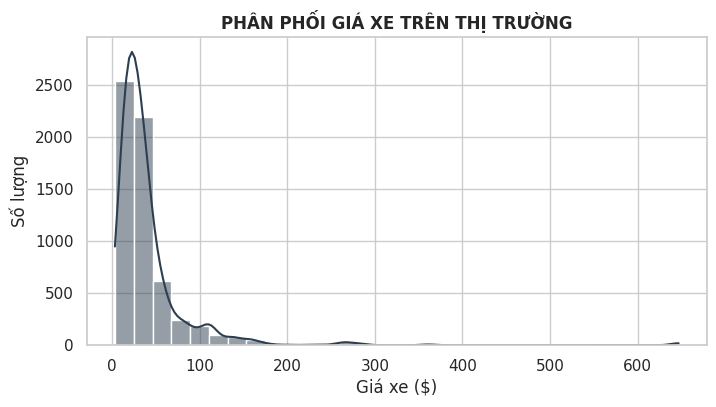

--- INSIGHT: Biểu đồ giúp nhận diện phân khúc giá phổ biến và các dòng xe cao cấp (Outliers).


In [ ]:
# --- #3: PHÂN TÍCH PHÂN PHỐI (DISTRIBUTION) ---
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True, color='#2c3e50', bins=30)
plt.title('PHÂN PHỐI GIÁ XE TRÊN THỊ TRƯỜNG', fontweight='bold')
plt.xlabel('Giá xe ($)')
plt.ylabel('Số lượng')
plt.show()

print("--- INSIGHT: Biểu đồ giúp nhận diện phân khúc giá phổ biến và các dòng xe cao cấp (Outliers).")

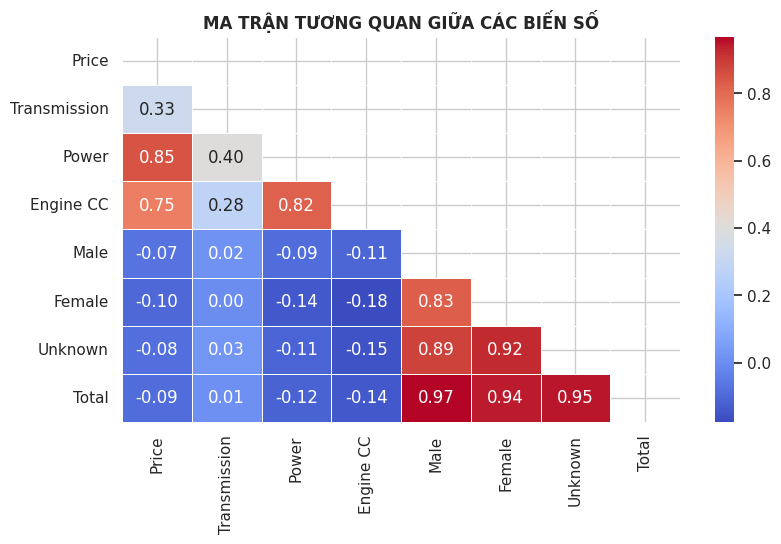

--- KEY INSIGHT: Các ô màu đỏ đậm thể hiện mối tương quan dương mạnh nhất với Giá xe (VD: Power, Engine CC).


In [ ]:
# --- #4: MA TRẬN TƯƠNG QUAN (CORRELATION) ---
plt.figure(figsize=(9, 5))

# Chỉ lấy cột số để tính toán tương quan
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Che nửa trên của ma trận cho gọn mắt
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ', fontweight='bold')
plt.show()

print("--- KEY INSIGHT: Các ô màu đỏ đậm thể hiện mối tương quan dương mạnh nhất với Giá xe (VD: Power, Engine CC).")

**BƯỚC 4: LƯU TRỮ KẾT QUẢ**  
Mục đích: Xuất file sạch để dùng cho File 02 (Training).

In [ ]:
# --- #5: EXPORT DATA ---
output_file = 'processed_carbuyers.csv'
df.to_csv(output_file, index=False)

print(f"✅ Đã lưu file sạch: '{output_file}'")

✅ Đã lưu file sạch: 'processed_carbuyers.csv'
